## PASSWORDS
We have a dataset of passwords ranked by their popularity. All information about variables are given below. Our task here is to visualize this dataset in meaningful ways.



| Variable          | Description  |        
|--------------------|---------|
| rank                | Popularity in their database of released passwords       |
| password      | Actual text of the password       |
| Category               | What category does the password fall in to?      |
| Value | Time to crack by online guessing       |
| time_unit                | Time unit to match with value      |
| offline_crack_sec      | Time to crack offline in seconds       |
| rank_alt                | Rank 2       |
| strength | Quality of password where 10 is highest, 1 is lowest, please note that these are relative to these generally bad passwords |
| font_size | Used to create the graphic for KIB|

First Let's import all packages required for this task

In [1]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics

### DATA INPUTTING AND CLEANING

Let's load our dataset and see what we are working with.

In [2]:
df = pd.read_csv("passwords.csv")
#Dropping #NaN Values.
df = df.dropna()
df

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...
495,496.0,reddog,cool-macho,3.72,days,3.210000e-03,498.0,6.0,10.0
496,497.0,alexande,name,6.91,years,2.170000e+00,499.0,9.0,12.0
497,498.0,college,nerdy-pop,3.19,months,8.350000e-02,500.0,7.0,11.0
498,499.0,jester,name,3.72,days,3.210000e-03,501.0,7.0,11.0


We can modify our DataFrame to make it easier to work with. In particular, values in the column __value__ has multiple units of measurement, as depicted by column __time_unit__. It would be better if these values are converted to seconds to make a better comparison with column __offline_crack_sec__.Variable __strength__ should be transformed so that each value ranges between 1 and 10 __font_size__ is an unnecessary and removing it from our dataset shouldn't hinder our viusal analysis.

In [3]:
#Creating a new modified Dataframe. Notice how font_size isn't included.
df1 = df[['rank','password','category','value','time_unit','offline_crack_sec','rank_alt','strength']]

#Transforming Variable Strength.
df1['strength_']= (df1['strength']/48)*10

#Each unit of measurement in 'value' will be converted to seconds and stored in dic_1.
dic_1 = {'online_guess':[]}
for i in df1['rank']:
    if df1['time_unit'][int(i)-1] == 'years':
        dic_1['online_guess'].append(df1['value'][int(i)-1]*3.154e+7)       
    elif df1['time_unit'][int(i)-1] == 'months':
        dic_1['online_guess'].append(df1['value'][int(i)-1]*2.628e+6)
    elif df1['time_unit'][int(i)-1] == 'weeks':
        dic_1['online_guess'].append(df1['value'][int(i)-1]*604800)
    elif df1['time_unit'][int(i)-1] == 'days':
        dic_1['online_guess'].append(df1['value'][int(i)-1]*86400)
    elif df1['time_unit'][int(i)-1] == 'hours':
        dic_1['online_guess'].append(df1['value'][int(i)-1]*3600)
    elif df1['time_unit'][int(i)-1] == 'minutes':
        dic_1['online_guess'].append(df1['value'][int(i)-1]* 60)
    else :
        dic_1['online_guess'].append(df1['value'][int(i)-1])
df2 = pd.DataFrame(dic_1)

#Joining our two data frames.
df1=df1.join(df2)

#Dropping unneccessary columns.
df1.drop('time_unit', axis=1, inplace=True)
df1.drop('value', axis=1, inplace=True)
df1.drop('strength', axis=1, inplace=True)
df1.head()

,rank,password,category,offline_crack_sec,rank_alt,strength_,online_guess
0,1.0,password,password-related,2.170000e+00,1.0,1.666667,2.179414e+08
1,2.0,123456,simple-alphanumeric,1.110000e-05,2.0,0.833333,1.111200e+03
2,3.0,12345678,simple-alphanumeric,1.110000e-03,3.0,0.833333,1.114560e+05
3,4.0,1234,simple-alphanumeric,1.110000e-07,4.0,0.833333,1.111000e+01
4,5.0,qwerty,simple-alphanumeric,3.210000e-03,5.0,1.666667,3.214080e+05


### VISUALIZATION

Now that we have a DataFrame we are comfortable with, We can visualize it. Firstly, It's of interest to know how passwords are distributed among categories.

Let's make a Bar chart to see the density of each category.

Text(0, 0.5, 'Frequency')

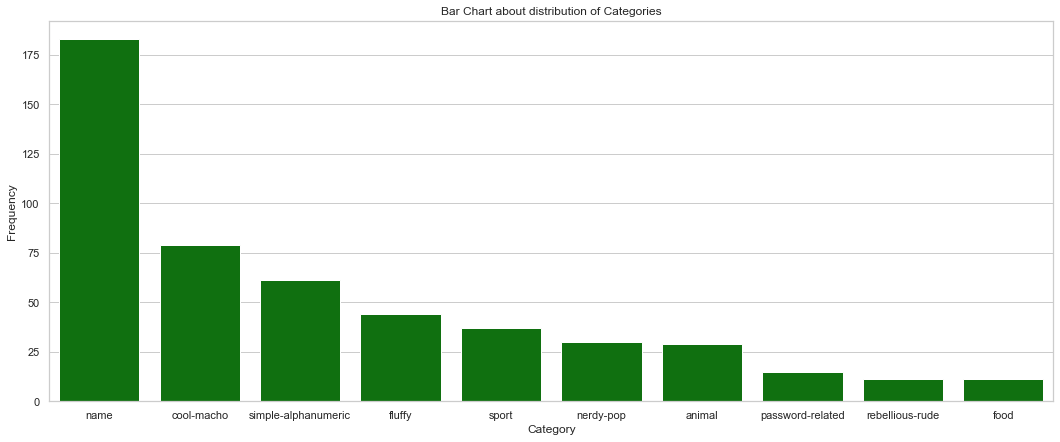

In [4]:
plt.figure(figsize=(18, 7))
sns.set(style="whitegrid")
sns.countplot(df1['category'], color='green', order = df1['category'].value_counts().index)
plt.title('Bar Chart about distribution of Categories')
plt.xlabel('Category') 
plt.ylabel('Frequency') 

As can be seen, highest frequency of passwords fall under the category of __name__ and it is more than twice as much as the second category __cool-macho__. The difference in frequency between categories is largest here. We see relativily smaller decreases until the last category __food__.

In [5]:
df1[['offline_crack_sec','online_guess']].describe()

,offline_crack_sec,online_guess
count,5.000000e+02,5.000000e+02
mean,5.000096e-01,5.012937e+07
std,2.658132e+00,2.660449e+08
min,1.110000e-07,1.111000e+01
25%,3.210000e-03,3.214080e+05
50%,3.210000e-03,3.214080e+05
75%,8.350000e-02,8.383320e+06
max,2.927000e+01,2.910196e+09


We are interested in visualizing how columns __offline_crack_sec__ and __value_in_sec__ is distributed among categories. 

Text(0.5, 1.0, 'Seconds it took crack password through offline cracking by each category')

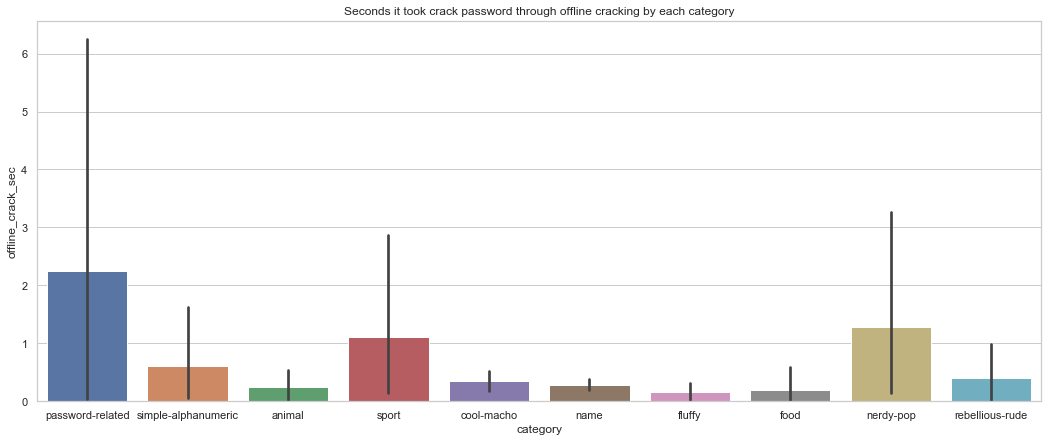

In [6]:
plt.figure(figsize=(18, 7))
sns.set(style="whitegrid")
sns.barplot(x=df1['category'],y=df1['offline_crack_sec'])
plt.title('Seconds it took crack password through offline cracking by each category')
#ax = sns.boxplot(x="category", y="online_guess", data=df1)

It's clear it took longest to crack __password-related__ passwords. It also has the highest amount of variation. The runner-up in this bar-chart is __nerdy-pop__. Other notable categories are __sport__ and __simple-aplphanumeric__.

For __value_in_sec__ bar chart, y-axis will be scaled to make our comparison between 2 graphs easier. 

Text(0.5, 1.0, 'Seconds it took crack password through online_guessing by each category')

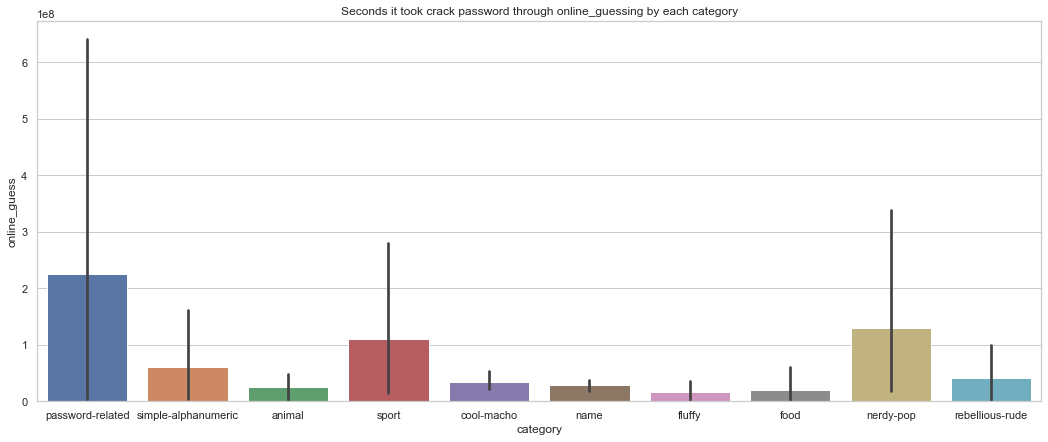

In [7]:
plt.figure(figsize=(18, 7))
sns.set(style="whitegrid")
sns.barplot(x=df1['category'],y=df1['online_guess'])
plt.title('Seconds it took crack password through online_guessing by each category')

Bar plot made from __seaborn__ will scale y-axis itself. It can be seen in the top-left corner that a value of __10^8__ was chosen. 

Look at that! the two bar charts are almost identical. This shows the effectiveness of method used to get values in __offline_crack_sec__. It improved the speed of cracking passwords almost __10^8__ times!

We are also interested in plotting a relationship of variable __strength__ with __online_guess__ and __offline_crack_sec__. One way of achieving our goal is to draw a scatterplot between them.

Text(0.5, 0.98, 'Relationship of strength with offline_crack_sec and online_guess with 95% Confidence Interval')

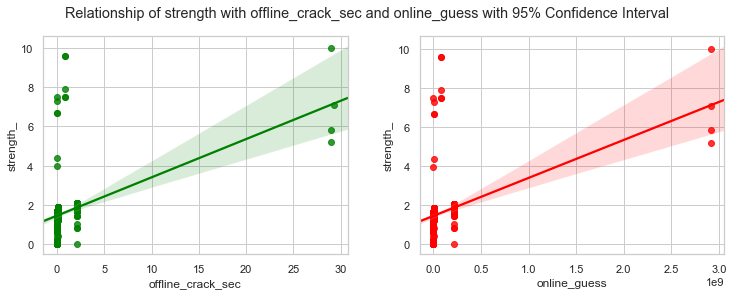

In [8]:
f, axes = plt.subplots(1, 2,figsize=(11,4.5))
sns.regplot(x='offline_crack_sec',y='strength_',data=df1,color='green',ax=axes[0])
sns.regplot(x='online_guess',y='strength_',data=df1,color='red',ax=axes[1])
f. tight_layout(pad=3.0)
f.suptitle('Relationship of strength with offline_crack_sec and online_guess with 95% Confidence Interval')

As it was expected, The two plots are almost identical with __online_guess__ axis scaled to 10^9. However, looking at these plots, there seems to be no relationship between strength and any of these variables. It seems ability to crack password early or late has little to do with its strength. 